<a href="https://colab.research.google.com/github/siruku6/MethematicsTrial/blob/master/easily_understandable_pattern_recognition/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# 第5章 教師付き学習と教師なし学習

## 前提条件

In [2]:
pis = [0.1, 0.4, 0.5]
thetas = np.array([0.8, 0.6, 0.3])

num_of_rounds = 10_000


## 実験用データ生成

p.95に記載の実験条件と実験結果に従って生成する

In [3]:
def select_dices(pis: list, num: int = 10) -> np.ndarray:
    """
    pisで指定した確率に基づいて、num回diceを取り出す

    Parameters
    ------
    pis: list
        それぞれのdiceの含有率
        Example: [0.2, 0.3, 0.5]

    num: int
        diceを取り出す回数
        Example: 100

    Return
    ------
    count_of_selected_dices: np.ndarray
        それぞれのdiceが選択された回数
        Example: np.array([12, 36, 52])
    """
    available_dices = [0, 1, 2]
    selected_dices = np.random.choice(a=available_dices, size=num, p=pis)
    count_of_selected_dices = np.bincount(selected_dices)
    return count_of_selected_dices


def count_face_of_dices(thetas: list, num_of_selected_dices: np.ndarray) -> np.ndarray:
    """
    thetasで指定した確率に基づいて、diceを振った結果を返す

    Parameters
    ------
    thetas: list
        それぞれのdiceが奇数の目を出す確率
        Example: [0.2, 0.3, 0.5]

    num_of_selected_dices: np.ndarray
        それぞれのdiceが選択された個数
        Example: np.array([12, 36, 52])

    Return
    ------
    count_of_selected_dices: np.ndarray
        それぞれのdiceを振った結果を連結したもの
        1次元配列になっている
        Example: np.array([0, 1, 0, 0 ..., 1])
    """
    num_face_of_dices = np.array([])
    for dice_no, count in enumerate(num_of_selected_dices):
        # サイコロの奇数の目が出る確率
        theta = thetas[dice_no]

        # 各サイコロ毎に、まとめて振る
        # たとえば、①のサイコロが88回選ばれているなら、①のサイコロだけを一気に88回振る
        face_of_dices = np.random.choice([0, 1], size=count , p=[theta, 1 - theta])
        num_face_of_dices = np.append(num_face_of_dices, face_of_dices)
    return num_face_of_dices


num_of_selected_dices = select_dices(pis, num_of_rounds)
# 出たサイコロの目の総リスト
x = count_face_of_dices(thetas, num_of_selected_dices)

# 選ばれたサイコロの総リスト
s = (
    [0] * num_of_selected_dices[0]
     + [1] * num_of_selected_dices[1]
     + [2] * num_of_selected_dices[2]
)
 

# x, s ともに、サイコロの種類ごとにソートされてしまっているので、シャッフルする
index_of_dices_series = np.arange(0, 10000)
np.random.shuffle(index_of_dices_series)

shuffled_x = pd.Series(x)[index_of_dices_series].astype(int)
shuffled_s = pd.Series(s)[index_of_dices_series].astype(int)


print("それぞれのサイコロが取り出された回数: ")
print("1...", num_of_selected_dices[0])
print("2...", num_of_selected_dices[1])
print("3...", num_of_selected_dices[2])
print("サイコロ1を振った結果", np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]))
print("サイコロ2を振った結果", np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]))
print("サイコロ3を振った結果", np.bincount(pd.Series(x)[-num_of_selected_dices[2]:]))

それぞれのサイコロが取り出された回数: 
1... 963
2... 3990
3... 5047
サイコロ1を振った結果 [764 199]
サイコロ2を振った結果 [2417 1573]
サイコロ3を振った結果 [1555 3492]


## p.83 教師付き学習


難しい内容ではなく、そこまで時間をかけるべきところではなかったので、ほぼ以下の記事に載っていた通りにコピーさせていただいた

- [Qiita / 続・わかりやすい　パターン認識　教師なし学習入門　アルゴリズムのサンプルコードを書いてみた](https://qiita.com/akiraichi5430/items/60ce2829a1b72dce5bca#5%E7%AB%A0%E6%95%99%E5%B8%AB%E4%BB%98%E3%81%8D%E5%AD%A6%E7%BF%92%E6%95%99%E5%B8%AB%E3%81%AA%E3%81%97%E5%AD%A6%E7%BF%92)

In [4]:
class SupervisedLearning(object):
    def __init__(self):
        self.pi = None
        self.theta = None
        self.n = None

    def fit(self, x, s):
        self.n = self.__count(x, s)
        self.pi = self.n.sum(axis=1) / self.n.sum()
        self.theta = self.n / np.tile(self.n.sum(axis=1), (self.n.shape[1], 1)).T

    @staticmethod
    def __count(x, s):
        n = np.zeros((max(s) + 1, max(x) + 1))
        for x_, s_ in zip(x, s):
            n[s_][x_] += 1
        return n


supervised = SupervisedLearning()
supervised.fit(shuffled_x, shuffled_s)
print(f"pi: {supervised.pi}")
print(f"theta: {supervised.theta}")

pi: [0.0963 0.399  0.5047]
theta: [[0.7933541  0.2066459 ]
 [0.60551378 0.39448622]
 [0.30810382 0.69189618]]


## p.86 教師なし学習

こちらが本命の勉強したかった処理の1つ

まずは、step1 から step4 まで、1stepずつ実装していく

### step 1

- $\pi_i$に対して仮の初期値を与える  
値はp.95に従う
- $\theta_{ik}は既知とする$

In [5]:
initial_pi_estimations = np.array([0.3, 0.5, 0.2])
print("π(初期値): ", initial_pi_estimations)
print("θ(既知)", thetas)

π(初期値):  [0.3 0.5 0.2]
θ(既知) [0.8 0.6 0.3]


### step 2

$$
P(\omega_i|v_k) = \frac{\pi_i * \theta_{ik}}{\sum^c_{j=1} \pi_j * \theta_{jk}}
$$

を計算する


In [6]:
# TODO: check
def step2(initial_pis, thetas) -> np.ndarray:
    pi_x_theta = initial_pi_estimations * np.array([thetas, 1 - thetas])
    sum_pi_x_theta = np.sum(pi_x_theta, axis=1)
    p_omega_v = (pi_x_theta) / np.tile(sum_pi_x_theta, (3, 1)).T
    return p_omega_v


p = step2(initial_pi_estimations, thetas)
p

array([[0.4 , 0.5 , 0.1 ],
       [0.15, 0.5 , 0.35]])

In [7]:
pi_x_theta = initial_pi_estimations * np.array([thetas, 1 - thetas])
pi_x_theta

array([[0.24, 0.3 , 0.06],
       [0.06, 0.2 , 0.14]])

### step 3-1

$$
\hat\pi_i = \frac{1}{n} \sum^m_{k=1} r_k * P(\omega_i|v_k)
$$

を計算する


In [8]:
print("サイコロ1を振った結果", np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]))
print("サイコロ2を振った結果", np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]))
print("サイコロ3を振った結果", np.bincount(pd.Series(x)[-num_of_selected_dices[2]:]))
print("より、\n")

r_k = np.array([
    np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]),
    np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]),
    np.bincount(pd.Series(x)[-num_of_selected_dices[2]:])
])
print("r_k: \n", np.sum(r_k, axis=0))
print("r_k_T: \n", np.sum(r_k, axis=0).reshape(-1, 1))

# p_omega_v = np.array([p, 1 - p])
print("p_omega_v: \n", p)


def step3_1(n: int, r_k: np.ndarray, p_omega_v: np.ndarray) -> np.ndarray:
    pi_i_hat = np.sum(r_k * p_omega_v, axis=0) / n
    return pi_i_hat


pi_i_hat = step3_1(10000, np.sum(r_k, axis=0).reshape(-1, 1), p)
print("pi_i_hat:", pi_i_hat)

サイコロ1を振った結果 [764 199]
サイコロ2を振った結果 [2417 1573]
サイコロ3を振った結果 [1555 3492]
より、

r_k: 
 [4736 5264]
r_k_T: 
 [[4736]
 [5264]]
p_omega_v: 
 [[0.4  0.5  0.1 ]
 [0.15 0.5  0.35]]
pi_i_hat: [0.2684 0.5    0.2316]


### step 3-2

$$
\hat{P}(\omega_i|v_k) = \frac{\hat\pi_i * \theta_{ik}}{\sum^c_{j=1} \hat\pi_j * \theta_{jk}}
$$

を計算する

In [9]:
def step3_2_P_hat(pi_hat, thetas) -> np.ndarray:
    p_hat = (pi_hat * np.array(thetas)) / sum(pi_hat * np.array(thetas))
    return p_hat


def step3_2_theta_hat(r_k, P_hat) -> np.ndarray:
    theta_hat = (r_k * P_hat) / np.tile(np.sum(r_k * P_hat, axis=0), (2, 1))
    return theta_hat


p_hat = step3_2_P_hat(pi_i_hat, thetas)
P_hat = np.array([p_hat, 1 - p_hat])

print("p_hat:\n", p_hat)
print("P_hat:\n", P_hat)

theta_hat = step3_2_theta_hat(np.transpose(r_k), P_hat)
theta_hat

p_hat:
 [0.36754536 0.51352277 0.11893187]
P_hat:
 [[0.36754536 0.51352277 0.11893187]
 [0.63245464 0.48647723 0.88106813]]


array([[0.69050926, 0.61860863, 0.05670144],
       [0.30949074, 0.38139137, 0.94329856]])

### step 4

$$
\pi_i = \hat\pi_i \\
\theta_{ik} = \hat\theta_{ik}
$$

In [10]:
pi = pi_i_hat
theta = theta_hat

### まとめ

ここまでの step 1 ~ step 4 をまとめて繰り返し実行できるようにする

In [20]:
r_k = np.array([
    np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]),
    np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]),
    np.bincount(pd.Series(x)[-num_of_selected_dices[2]:])
])
r_k_T = np.sum(r_k, axis=0).reshape(-1, 1)
print("r_k_T:", r_k_T)

# step1
initial_pi_estimations = np.array([0.3, 0.5, 0.2])
thetas


class UnsupervisedLearning:
    def __init__(
        self,
        n: int,
        initial_pi_hat: np.ndarray,
        initial_theta_hat: np.ndarray,
        r_k_T: np.ndarray
    ):
        self.n = n
        self.pi_hat = initial_pi_hat
        self.theta_hat = initial_theta_hat
        self.r_k_T = r_k_T

    def fit(self):
        epsilon = 1e-8
        variation = np.array([1, 1, 1])
        num_round = 0
        pi_hat_hist = np.array([self.pi_hat])

        while((np.abs(variation) > epsilon).any()):
            num_round += 1

            # step2
            p = self.step2()

            # step3
            pi_i_hat = self.step3_1(p)
            P_hat = self.step3_2_P_hat(pi_i_hat)
            theta_hat = self.step3_2_theta_hat(P_hat)

            variation = pi_i_hat - self.pi_hat

            # step4
            self.pi_hat = pi_i_hat
            # 今回は更新しない theta は既知として扱うため
            # p.95の実験条件の5項目目を参照
            #   注) "step3は省いた"と記載されているが、おそらく"step3-2省いた"が正しいと思われる
            # theta = theta_hat

            pi_hat_hist = np.concatenate([pi_hat_hist, [self.pi_hat]], axis=0)
            print(num_round, "pi_hat:", self.pi_hat, "max variation:", max(variation))

        self.pi_hat_hist = pi_hat_hist

    def step2(self) -> np.ndarray:
        pi_x_theta = self.pi_hat * np.array([self.theta_hat, 1 - self.theta_hat])
        sum_pi_x_theta = np.sum(pi_x_theta, axis=1)
        p_omega_v = (pi_x_theta) / np.tile(sum_pi_x_theta, (3, 1)).T
        return p_omega_v

    def step3_1(self, p_omega_v: np.ndarray) -> np.ndarray:
        pi_i_hat = np.sum(self.r_k_T * p_omega_v, axis=0) / self.n
        return pi_i_hat

    def step3_2_P_hat(self, pi_hat: np.ndarray) -> np.ndarray:
        p_hat = (pi_hat * np.array(self.theta_hat)) / sum(pi_hat * np.array(self.theta_hat))
        return p_hat

    def step3_2_theta_hat(self, P_hat: np.ndarray) -> np.ndarray:
        theta_hat = (self.r_k_T * P_hat) / np.tile(np.sum(self.r_k_T * P_hat, axis=0), (2, 1))
        return theta_hat


model = UnsupervisedLearning(10000, initial_pi_estimations, thetas, r_k_T)
model.fit()

r_k_T: [[4736]
 [5264]]
1 pi_hat: [0.2684 0.5    0.2316] max variation: 0.031599999999999934
2 pi_hat: [0.242028   0.49640304 0.26156896] max variation: 0.029968963168141544
3 pi_hat: [0.2201433  0.49053732 0.28931938] max variation: 0.02775041739982359
4 pi_hat: [0.20202739 0.48342605 0.31454656] max variation: 0.025227180995082754
5 pi_hat: [0.18703335 0.47580288 0.33716377] max variation: 0.022617209271705963
6 pi_hat: [0.17460475 0.46816137 0.35723388] max variation: 0.02007010463377107
7 pi_hat: [0.16427649 0.46081229 0.37491123] max variation: 0.01767735033114337
8 pi_hat: [0.15566653 0.45393533 0.39039814] max variation: 0.015486911415984905
9 pi_hat: [0.14846422 0.44762061 0.40391517] max variation: 0.013517031235734056
10 pi_hat: [0.14241816 0.44189946 0.41568238] max variation: 0.011767206959970467
11 pi_hat: [0.13732521 0.43676633 0.42590846] max variation: 0.01022608404162978
12 pi_hat: [0.13302101 0.43219378 0.43478521] max variation: 0.008876748926858247
13 pi_hat: [0.129

Text(0, 0.5, 'Estimation of probability')

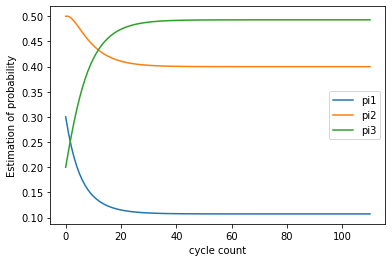

In [12]:
result = pd.DataFrame(model.pi_hat_hist) \
           .rename(columns={0: "pi1", 1: "pi2", 2: "pi3"})

result.plot()
plt.xlabel("cycle count")
plt.ylabel("Estimation of probability")

### おまけに

p.96の $\log_{}P(\textbf{x})$ も計算してグラフを出したいので、それも付け加える。


$\log_{}P(\textbf{x})$ は、p.87の(5.51)式と(5.53)式から、以下のように導出できる。


$$
\log_{}P(\textbf{x}) = \sum^m_{k=1} r_k * \log_{}P(v_k)\\
= \sum^m_{k=1} r_k * \log \left(\sum^c_{i=1} \pi_i * \theta_{ik} \right)
$$


要素1個ずつ計算してみる

In [13]:
# r_k
np.sum(r_k, axis=0)

array([4736, 5264])

In [14]:
# sum(pi_i * theta_ik)
pi_x_theta = initial_pi_estimations * np.array([thetas, 1 - thetas])
sum_pi_x_theta = np.sum(pi_x_theta, axis=1)
sum_pi_x_theta

array([0.6, 0.4])

In [33]:
# log(P(x_k)) = log( sum(pi_i * theta_ik) )
np.log(sum_pi_x_theta)

array([-0.51082562, -0.91629073])

In [34]:
# r_k * log(P(x_k))
np.sum(r_k, axis=0) * np.log(sum_pi_x_theta)

array([-2419.27015416, -4823.35441259])

In [46]:
# log_P(x)
def calc_log_P(r_k, pi_hat, thetas):
    pi_x_theta = pi_hat * np.array([thetas, 1 - thetas])
    _sum_pi_i_theta = np.sum(pi_x_theta, axis=1)
    log_P = sum(r_k * np.log(_sum_pi_i_theta))
    return log_P


calc_log_P(np.sum(r_k, axis=0), initial_pi_estimations, thetas)

-7242.624566741282

先程実装した UnsupervisedLearningクラスに、log_Pの計算処理も追加する

In [51]:
class UnsupervisedLearning:
    def __init__(
        self,
        n: int,
        initial_pi_hat: np.ndarray,
        initial_theta_hat: np.ndarray,
        r_k: np.ndarray  # 書き換えた
    ):
        self.n = n
        self.pi_hat = initial_pi_hat
        self.theta_hat = initial_theta_hat
        self.r_k = r_k  # 書き換えた

    def fit(self):
        epsilon = 1e-8
        variation = np.array([1, 1, 1])
        num_round = 0
        pi_hat_hist = np.array([self.pi_hat])
        log_P_hist = np.array([self.calc_log_P()])  # 追加した

        while((np.abs(variation) > epsilon).any()):
            num_round += 1

            # step2
            p = self.step2()

            # step3
            pi_i_hat = self.step3_1(p)
            P_hat = self.step3_2_P_hat(pi_i_hat)
            theta_hat = self.step3_2_theta_hat(P_hat)

            variation = pi_i_hat - self.pi_hat

            # step4
            self.pi_hat = pi_i_hat
            # 今回は更新しない theta は既知として扱うため
            # p.95の実験条件の5項目目を参照
            #   注) "step3は省いた"と記載されているが、おそらく"step3-2省いた"が正しいと思われる
            # theta = theta_hat

            pi_hat_hist = np.concatenate([pi_hat_hist, [self.pi_hat]], axis=0)
            log_P = self.calc_log_P()
            log_P_hist = np.concatenate([log_P_hist, [log_P]], axis=0)  # 追加した
            print(num_round, "pi_hat:", self.pi_hat, "log_P:", log_P)  # 書き換えた  せっかくだから log_P をprint

        self.pi_hat_hist = pi_hat_hist
        self.log_P_hist = log_P_hist  # 追加した

    def step2(self) -> np.ndarray:
        pi_x_theta = self.pi_hat * np.array([self.theta_hat, 1 - self.theta_hat])
        sum_pi_x_theta = np.sum(pi_x_theta, axis=1)
        p_omega_v = (pi_x_theta) / np.tile(sum_pi_x_theta, (3, 1)).T
        return p_omega_v

    def step3_1(self, p_omega_v: np.ndarray) -> np.ndarray:
        pi_i_hat = np.sum(self.r_k.reshape(-1, 1) * p_omega_v, axis=0) / self.n  # self.r_k のところを書き換えた
        return pi_i_hat

    def step3_2_P_hat(self, pi_hat: np.ndarray) -> np.ndarray:
        p_hat = (pi_hat * np.array(self.theta_hat)) / sum(pi_hat * np.array(self.theta_hat))
        return p_hat

    def step3_2_theta_hat(self, P_hat: np.ndarray) -> np.ndarray:
        theta_hat = (self.r_k.reshape(-1, 1) * P_hat) / np.tile(np.sum(self.r_k.reshape(-1, 1) * P_hat, axis=0), (2, 1))  # self.r_k のところを書き換えた
        return theta_hat

    # ---------------関数追加した-------------------#
    def calc_log_P(self):
        _r_k = self.r_k
        pi_x_theta = self.pi_hat * np.array([self.theta_hat, 1 - self.theta_hat])
        _sum_pi_i_theta = np.sum(pi_x_theta, axis=1)
        log_P = sum(_r_k * np.log(_sum_pi_i_theta))
        return log_P
    # ------------------ここまで-------------------#

model = UnsupervisedLearning(10000, initial_pi_estimations, thetas, np.sum(r_k, axis=0))  # r_k のところを書き換えた
model.fit()

1 pi_hat: [0.2684 0.5    0.2316] log_P: -7165.084262769455
2 pi_hat: [0.242028   0.49640304 0.26156896] log_P: -7104.597738217199
3 pi_hat: [0.2201433  0.49053732 0.28931938] log_P: -7058.120688033877
4 pi_hat: [0.20202739 0.48342605 0.31454656] log_P: -7022.806944302263
5 pi_hat: [0.18703335 0.47580288 0.33716377] log_P: -6996.188644411137
6 pi_hat: [0.17460475 0.46816137 0.35723388] log_P: -6976.23267934039
7 pi_hat: [0.16427649 0.46081229 0.37491123] log_P: -6961.322428995384
8 pi_hat: [0.15566653 0.45393533 0.39039814] log_P: -6950.203635314101
9 pi_hat: [0.14846422 0.44762061 0.40391517] log_P: -6941.919430563631
10 pi_hat: [0.14241816 0.44189946 0.41568238] log_P: -6935.748033772942
11 pi_hat: [0.13732521 0.43676633 0.42590846] log_P: -6931.148980474886
12 pi_hat: [0.13302101 0.43219378 0.43478521] log_P: -6927.7194044885655
13 pi_hat: [0.12937226 0.42814245 0.44248529] log_P: -6925.159770108523
14 pi_hat: [0.12627044 0.42456752 0.44916204] log_P: -6923.247628906938
15 pi_hat: [0

Text(0, 0.5, 'log P')

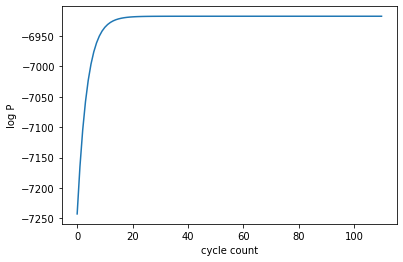

In [52]:
plt.plot(model.log_P_hist)
plt.xlabel("cycle count")
plt.ylabel("log P")

p.96と同様の結果が確認できた\\( ˙꒳˙ \\三/ ˙꒳˙)/